In [29]:
# Imports

import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,calendar,csv,time

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Conv2D,Dropout,BatchNormalization,Input,Concatenate,Add,Activation,MaxPooling2D,AveragePooling2D
import keras.backend as K

from sklearn import preprocessing as pp

from sklearn.cluster import KMeans,MeanShift
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import BayesianRidge,Lasso,LinearRegression,SGDClassifier,SGDRegressor
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,RadiusNeighborsClassifier,RadiusNeighborsRegressor,NearestNeighbors
from sklearn.manifold import Isomap,TSNE
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.neural_network import BernoulliRBM,MLPClassifier,MLPRegressor
from sklearn.decomposition import FactorAnalysis,KernelPCA,PCA,MiniBatchSparsePCA,FastICA
from sklearn.preprocessing import CategoricalEncoder,KBinsDiscretizer,LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler

from xgboost import XGBClassifier,XGBRegressor

import gym
import pygame
from pygame.locals import *

import pickle,h5py,json

import pandas_datareader as pdr
import urllib
from bs4 import BeautifulSoup
import iexfinance as iex
from iexfinance.stocks import get_historical_data
from scipy.signal import resample,correlate
from scipy import fftpack

warnings.filterwarnings('ignore')
sns.set()
plt.xkcd()

In [2]:
start_date = datetime.datetime(2014,1,1)
end_date = datetime.datetime(2017,1,1)

with open('Documents\stock_symb.txt','r') as f:
    lines = f.readlines()
content = [line.strip() for line in lines]
tickers = [content[i] for i in list(np.random.permutation(np.arange(len(content))))]

In [3]:
ticker_set = tickers[:25]
datesequ = get_historical_data(ticker_set[0],start=start_date,end=end_date,output_format='pandas').index

DATA = []
DF = []

ctr = 0
for ticker in ticker_set:

    print('Processing %d/%d'%(ctr,len(ticker_set)))
    ctr += 1
    try:
        df = get_historical_data(ticker,start=start_date,end=end_date,output_format='pandas')
    except:
        continue
    if df.shape[0]!=len(datesequ): continue
    
    open_price = df['open'].values.reshape(1,-1)
    high_price = df['high'].values.reshape(1,-1)
    low_price = df['low'].values.reshape(1,-1)
    close_price = df['close'].values.reshape(1,-1)
    volume = df['volume'].values.reshape(1,-1)
    
    if open_price.shape[1]==0: continue
    if high_price.shape[1]==0: continue
    if low_price.shape[1]==0: continue
    if close_price.shape[1]==0: continue
    if volume.shape[1]==0: continue
    if any([math.isnan(float(k)) for k in list(open_price[0])]): continue
    if any([math.isnan(float(k)) for k in list(high_price[0])]): continue
    if any([math.isnan(float(k)) for k in list(low_price[0])]): continue
    if any([math.isnan(float(k)) for k in list(close_price[0])]): continue
    if any([math.isnan(float(k)) for k in list(volume[0])]): continue
    
    DF.append(df)
    
    ts = np.append(open_price,high_price,axis=0)
    ts = np.append(ts,low_price,axis=0)
    ts = np.append(ts,close_price,axis=0)
    ts = np.append(ts,volume,axis=0)
    
    DATA.append(ts)

data = np.stack(DATA,axis=0)

Processing 0/25
Processing 1/25
Processing 2/25
Processing 3/25
Processing 4/25
Processing 5/25
Processing 6/25
Processing 7/25
Processing 8/25
Processing 9/25
Processing 10/25
Processing 11/25
Processing 12/25
Processing 13/25
Processing 14/25
Processing 15/25
Processing 16/25
Processing 17/25
Processing 18/25
Processing 19/25
Processing 20/25
Processing 21/25
Processing 22/25
Processing 23/25
Processing 24/25


In [4]:
df = DF[0]

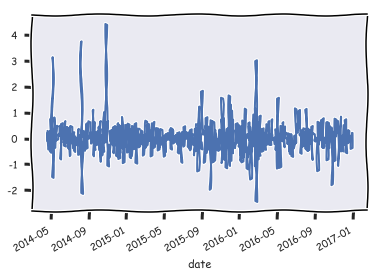

In [5]:
df['open'].diff().plot()

In [6]:
std1_thU = df['open'].diff().mean()+df['open'].diff().var()
std1_thL = df['open'].diff().mean()-df['open'].diff().var()

In [7]:
std1_thU

0.32049467197195747

In [8]:
std1_thL

-0.30568528780773463

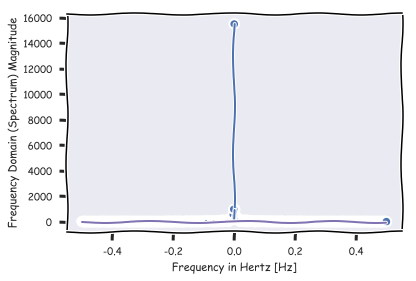

In [13]:
x = df['open'].values
f_s = 1

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.show()

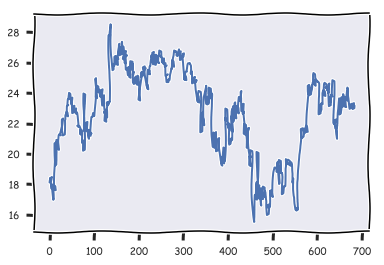

In [14]:
plt.plot(x)

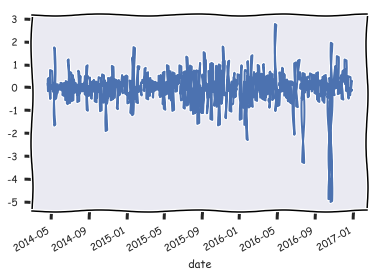

In [33]:
DF[1]['open'].diff().plot()

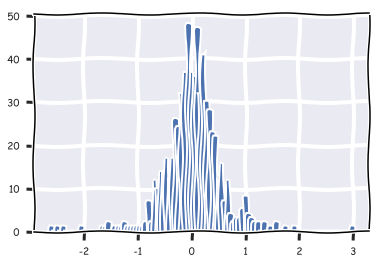

In [38]:
DF[4]['open'].diff().hist(bins=100)

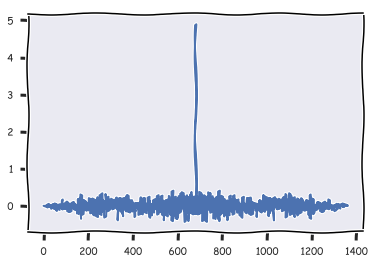

In [37]:
plt.plot(correlate(DF[5]['open'].diff().values[1:],DF[5]['open'].diff().values[1:]))

In [26]:
DF[1]['open'].diff().values

array([    nan,  0.1716,  0.0667,  0.4193,  0.1048, -0.162 ,  0.0954,
        0.0476, -0.5051, -0.2859,  0.7624, -0.0095, -0.0382, -0.0953,
        0.143 , -0.1811,  0.9626,  1.7536, -1.6678,  0.2192, -0.5242,
       -0.1239, -0.2764,  0.143 , -0.0667, -0.0954, -0.0476,  0.0953,
       -0.0953, -0.0381,  0.0286,  0.2001,  0.1811, -0.143 ,  0.1239,
       -0.162 , -0.3717,  0.    ,  0.1811,  0.1334, -0.305 ,  0.2288,
        0.0762, -0.5585,  0.2821, -0.7338, -0.5814, -0.1715,  1.2294,
        0.143 , -0.6862,  0.3145, -0.629 ,  0.6862, -0.1144, -0.2383,
        0.1239, -0.6004,  0.5337,  0.2955,  0.3335, -0.2287,  0.2001,
        0.1716, -0.1144,  0.0667,  0.0668,  0.0762, -0.3336,  0.143 ,
       -0.6386,  0.7339, -0.2669, -0.019 ,  0.1429,  0.5051,  0.1811,
        0.1239, -0.1715, -0.143 ,  0.1716, -0.1239,  0.1048, -0.1239,
        0.    ,  0.2859,  0.    , -0.3431,  0.4956,  0.143 ,  0.9721,
       -1.0198,  0.5147,  0.0095,  0.0858, -0.3717,  0.4384, -0.2955,
        0.1716, -0.4